# Introduction to Time Series with Python

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("air_passengers.csv")
df

,date,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [4]:
df.dtypes

date    object
y        int64
dtype: object

In [5]:
df['date'] = pd.to_datetime(df.date)

In [6]:
df.dtypes

date    datetime64[ns]
y                int64
dtype: object

<AxesSubplot: xlabel='date'>

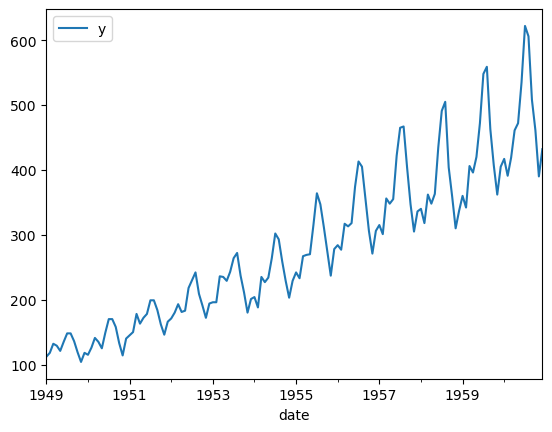

In [7]:
df.plot(x='date', y='y')

In [8]:
df['y_log'] = np.log(df.y)
df

,date,y,y_log
0,1949-01-01,112,4.718499
1,1949-02-01,118,4.770685
2,1949-03-01,132,4.882802
3,1949-04-01,129,4.859812
4,1949-05-01,121,4.795791
...,...,...,...
139,1960-08-01,606,6.406880
140,1960-09-01,508,6.230481
141,1960-10-01,461,6.133398
142,1960-11-01,390,5.966147


<AxesSubplot: xlabel='date'>

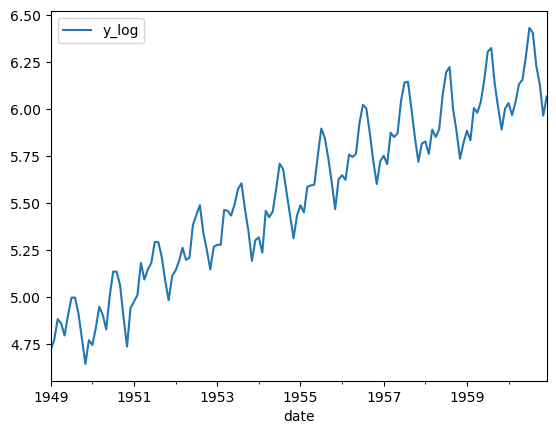

In [9]:
df.plot(x='date', y='y_log')

# Fit a Models and make predictions

In [11]:
df = df[['date', 'y']]
df['unique_id'] = "1"
df

,date,y,unique_id
0,1949-01-01,112,1
1,1949-02-01,118,1
2,1949-03-01,132,1
3,1949-04-01,129,1
4,1949-05-01,121,1
...,...,...,...
139,1960-08-01,606,1
140,1960-09-01,508,1
141,1960-10-01,461,1
142,1960-11-01,390,1


In [13]:
df.columns = ['ds', 'y', 'unique_id']
df

,ds,y,unique_id
0,1949-01-01,112,1
1,1949-02-01,118,1
2,1949-03-01,132,1
3,1949-04-01,129,1
4,1949-05-01,121,1
...,...,...,...
139,1960-08-01,606,1
140,1960-09-01,508,1
141,1960-10-01,461,1
142,1960-11-01,390,1


In [14]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

/home/marbel/anaconda3/envs/ts/lib/python3.8/site-packages/statsforecast/core.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [15]:
sf = StatsForecast(
    models = [AutoARIMA(season_length = 12)],
    freq = 'M'
)

In [16]:
sf.fit(df)

StatsForecast(models=[AutoARIMA])

In [21]:
from datetime import timedelta

forecast_df = sf.predict(h=12, level=[95]) 
forecast_df['ds'] = forecast_df['ds'] + timedelta(days=1)
forecast_df

,ds,AutoARIMA,AutoARIMA-lo-95,AutoARIMA-hi-95
unique_id,,,,
1,1961-01-01,444.300049,421.179474,467.420624
1,1961-02-01,418.210022,389.988434,446.431610
1,1961-03-01,446.237030,412.620667,479.853394
1,1961-04-01,488.228943,450.265289,526.192566
1,1961-05-01,499.231354,457.290192,541.172546
1,1961-06-01,562.230652,516.679749,607.781555
1,1961-07-01,649.230835,600.329895,698.131836
1,1961-08-01,633.230774,581.196655,685.264893
1,1961-09-01,535.230774,480.241302,590.220276


In [18]:
df.tail()

,ds,y,unique_id
139,1960-08-01,606,1
140,1960-09-01,508,1
141,1960-10-01,461,1
142,1960-11-01,390,1
143,1960-12-01,432,1


# Train/Test Split

In [23]:
y_train = df[df.ds <= '1959-12-31']
y_train.shape

(132, 3)

In [24]:
y_test = df[df.ds > '1959-12-31'] 
y_test.shape

(12, 3)

In [29]:
from IPython.display import display, Markdown

import matplotlib.pyplot as plt
from statsforecast import StatsForecast
from statsforecast.utils import AirPassengersDF
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, AutoETS, Naive

In [26]:
# Monthly data
season_length = 12 

# Period we are predicting forward
horizon = len(y_test) # 12 

In [30]:
models = [
    AutoARIMA(season_length=season_length),
    AutoETS(season_length=season_length),
    Naive()
]

In [31]:
# Instansiate the StatsForecast class as sf
sf = StatsForecast(
    df=y_train,
    models=models,
    freq='M', 
    n_jobs=-1
)

In [32]:
# Forecast for the defined horizon
y_preds = sf.forecast(horizon)

In [34]:
y_preds['ds'] = y_preds['ds'] + timedelta(days=1)
y_preds

,ds,AutoARIMA,AutoETS,Naive
unique_id,,,,
1,1960-01-01,424.160156,406.651276,405.0
1,1960-02-01,407.081696,401.732910,405.0
1,1960-03-01,470.860535,456.289642,405.0
1,1960-04-01,460.913605,440.870514,405.0
1,1960-05-01,484.900879,440.333923,405.0
1,1960-06-01,536.903931,496.866058,405.0
1,1960-07-01,612.903198,545.839111,405.0
1,1960-08-01,623.903381,544.672485,405.0
1,1960-09-01,527.903320,477.034485,405.0


In [36]:
y_preds = y_preds.merge(y_test, how='inner', on=['unique_id', 'ds'])
y_preds

,unique_id,ds,AutoARIMA,AutoETS,Naive,y
0,1,1960-01-01,424.160156,406.651276,405.0,417
1,1,1960-02-01,407.081696,401.732910,405.0,391
2,1,1960-03-01,470.860535,456.289642,405.0,419
3,1,1960-04-01,460.913605,440.870514,405.0,461
4,1,1960-05-01,484.900879,440.333923,405.0,472
5,1,1960-06-01,536.903931,496.866058,405.0,535
6,1,1960-07-01,612.903198,545.839111,405.0,622
7,1,1960-08-01,623.903381,544.672485,405.0,606
8,1,1960-09-01,527.903320,477.034485,405.0,508
9,1,1960-10-01,471.903320,412.423096,405.0,461


In [37]:
plot_df = pd.concat([y_train.tail(24), y_preds]).set_index('ds')

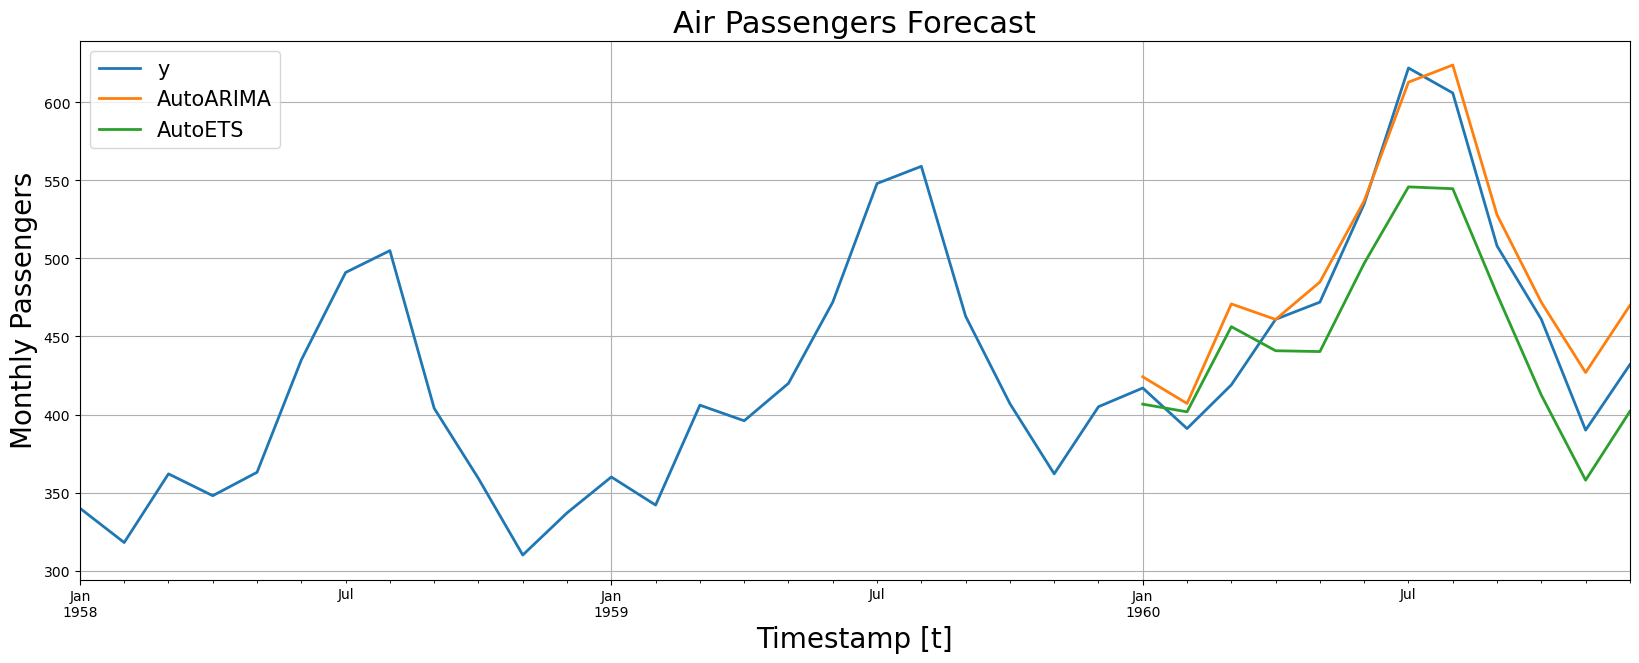

In [39]:
fig, ax = plt.subplots(1, 1, figsize = (20, 7))

plot_df[['y', 'AutoARIMA', 'AutoETS']].plot(ax=ax, linewidth=2)

ax.set_title('Air Passengers Forecast', fontsize=22)
ax.set_ylabel('Monthly Passengers', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

# Model Evaluation

In [41]:
def MAE(true, preds):
    return np.mean( np.abs( true - preds ) )

In [43]:
MAE(y_preds['y'], y_preds['AutoARIMA'])

18.550587972005207

In [44]:
MAE(y_preds['y'], y_preds['AutoETS'])

35.612475077311196

In [45]:
MAE(y_preds['y'], y_preds['Naive'])

76.0

In [46]:
y_preds['ensamble'] = (y_preds['AutoARIMA'] + y_preds['AutoETS']) / 2

In [47]:
MAE(y_preds['y'], y_preds['ensamble'])

16.023768107096355